In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hemant Rajput\Downloads\archive\CrabAgePrediction.csv")

In [3]:
df.head(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662132,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491247,29.000000


### Min. Height is 0 it means some data is missing, let's check what's missing

In [6]:
# Count the number of occurrences for each unique height value
height_counts = df['Height'].value_counts()

# Check if there are any persons with a height of zero
if 0.000000 in height_counts.index:
    num_persons_with_zero_height = height_counts[0.000000]
else:
    num_persons_with_zero_height = 0
    
num_persons_with_zero_height

2

### Only 2 missing records, so we can just drop them.

In [7]:
df = df[df['Height'] > 0.000000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3891 non-null   object 
 1   Length          3891 non-null   float64
 2   Diameter        3891 non-null   float64
 3   Height          3891 non-null   float64
 4   Weight          3891 non-null   float64
 5   Shucked Weight  3891 non-null   float64
 6   Viscera Weight  3891 non-null   float64
 7   Shell Weight    3891 non-null   float64
 8   Age             3891 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 304.0+ KB


In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

### No missing values. Now, lety's check target variable, it's Skewness(asymmetry of distribution), Kurtosis(describes the tails and the peakness of the distribution), and it's summary

In [9]:
print("Skewness: %.3f" % df['Age'].skew())
print("Kurtosis: %.3f" % df['Age'].kurt())

print(df['Age'].describe())

Skewness: 1.104
Kurtosis: 2.335
count    3891.000000
mean        9.956309
std         3.221018
min         1.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        29.000000
Name: Age, dtype: float64


### Also let's visualize it's distribution

C:\Users\Hemant Rajput\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

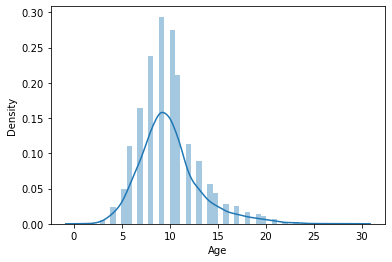

In [10]:
sns.distplot(df['Age'])

### Now let's explore categorical variable, if something different we can find out

<AxesSubplot:>

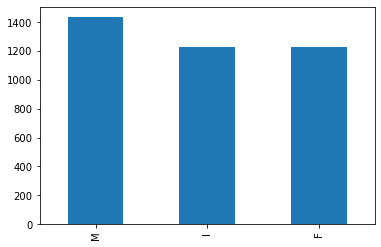

In [11]:
df['Sex'].value_counts().plot.bar()

### Now, using pairplot, let's see what can we visualize through graphs

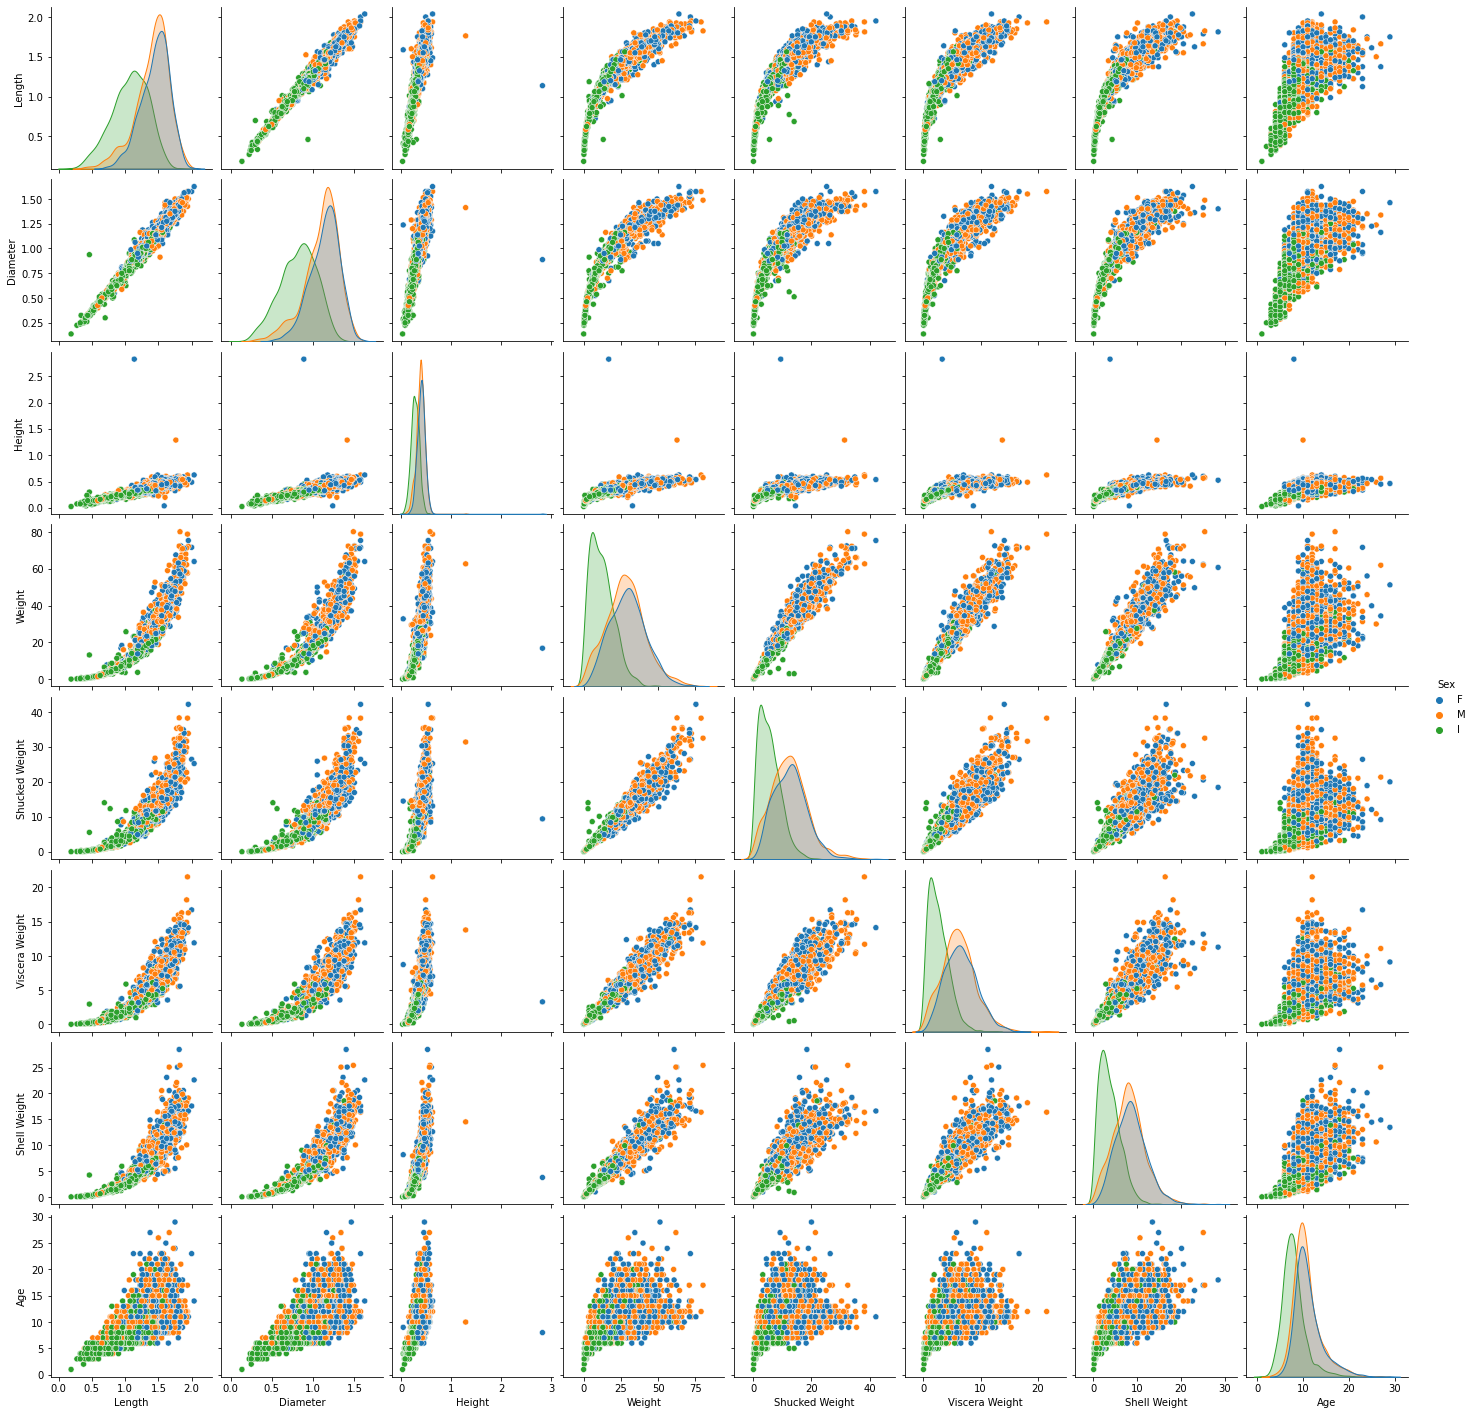

In [12]:
sns.pairplot(data=df,hue='Sex')

### Most features are highly correlated with each other

### let's create a correlation matrix, which would visualize the correlation between different columns

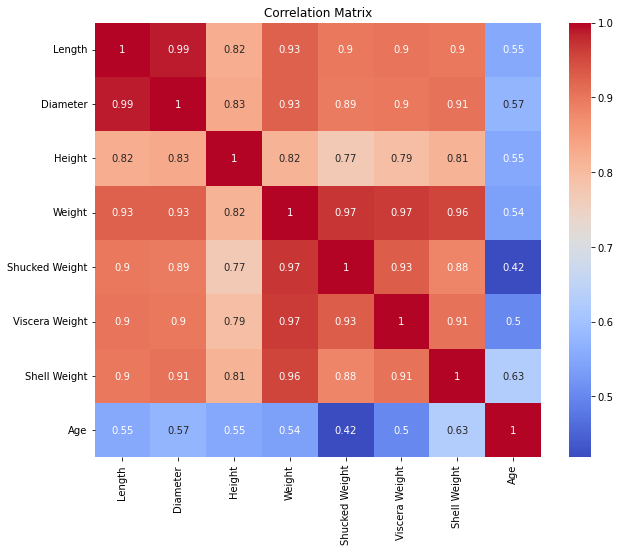

In [13]:
correlation = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### We can see that there are two outliers in height, let's see them closely using scatter plot

C:\Users\Hemant Rajput\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Height'>

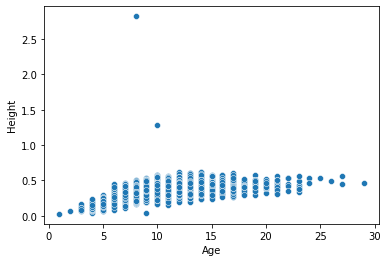

In [14]:
sns.scatterplot(df['Age'],df['Height'])


### It better to remove these two outliers of height > 1.0

In [15]:
mask = df['Height'] > 1
df = df[~mask]

### If it's better or not

C:\Users\Hemant Rajput\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Height'>

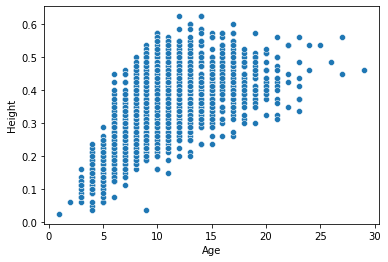

In [16]:
sns.scatterplot(df['Age'],df['Height'])


### So, it looks fine, Now We have categorical feature Gender let's use one-hot encoding to convert them into binary number

In [17]:
df = pd.get_dummies(df,columns=["Sex"])
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


### Shucked weight is the weight of the edible meat, and the Viscera Weight is the weight of the crab's internal organs 
### We want to predict Age, from table we can see that if we could some do feature engineering and create some new feature that will be helpful in getting the better results.
#### from this  (length, height, and diameter) we can create a new feature Size(Volume) which would be somewhat directly related to Age
#### Someone who has eaten crabs, they know that they only get a small amount of edible meat relative to size, so let's create more features like Density which will give how solid the crab is and in a similar manner Viscera Density as well as Shucked Density


In [18]:
df['Size'] = df['Length']*df['Diameter']*df['Height']

df['Density'] = df['Weight']/df['Size']
df['Shucked_Density'] = df['Shucked Weight']/df['Size']
df['Viscera_Density'] = df['Viscera Weight'] /df['Size']

In [19]:
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Size,Density,Shucked_Density,Viscera_Density
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0,0.696738,35.358636,17.699663,8.015709
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1,0.122586,44.055459,18.732242,11.216219
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0,0.201016,39.559287,16.077571,7.968270
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0,0.260703,51.707041,18.214363,8.753768
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0,0.124943,55.249861,27.681655,11.912188


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
import xgboost as XGB


In [21]:
X = df.drop('Age',axis = 1)
Y = df['Age']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size = 0.2, 
                                                    random_state = 123
                                                   )

## Modelling

### Linear regression model

In [22]:
model1 = LinearRegression()

In [23]:
model1.fit(X_train,Y_train)

LinearRegression()

In [24]:
prediction1 = model1.predict(X_test)

In [25]:
print ('Result using Linear Regression:')
print("MSE: %.3f" % mean_squared_error(Y_test,prediction1))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(Y_test,prediction1)))
print("MAE: %.3f" % mean_absolute_error(Y_test,prediction1))
print("R2: %.3f" % r2_score(Y_test,prediction1))

Result using Linear Regression:
MSE: 4.295
RMSE: 2.073
MAE: 1.502
R2: 0.562


### Random forest regressor model

In [26]:
model2 = RandomForestRegressor(random_state= 123)


In [27]:
Grid_param = {
    'n_estimators': [200,300],
    'max_depth': [5,10,15,None],
    'min_samples_split': [0.01,0.02],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
model2_GS = GridSearchCV(estimator=model2,
                     param_grid=Grid_param,
                     scoring= ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                     refit = 'neg_mean_squared_error',
                     cv = 5,
                     n_jobs = -1,
                     verbose = 2
                     )

In [29]:
model2_GS.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [0.01, 0.02],
                         'n_estimators': [200, 300]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'],
             verbose=2)

In [30]:
print(model2_GS.best_params_)
print(model2_GS.best_score_)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 0.01, 'n_estimators': 300}
-4.703900295212042


### XGBoost regressor model

In [31]:
model3 = XGB.XGBRegressor(eval_metric = 'rmse',n_jobs= -1,random_state=123)

In [32]:
Grid_param2 = {
    'n_estimators': [400,500],
    'max_depth': [5,10],
    'learning_rate': [0.01,0.02],
    'subsample': [0.9,1],
}


In [33]:
model3_GS = GridSearchCV(estimator=model3,
                     param_grid=Grid_param2,
                     scoring= ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                     refit = 'neg_mean_squared_error',
                     cv = 5,
                     n_jobs = -1,
                     verbose = 8
                     )

In [34]:
model3_GS.fit(X_train,Y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                 

In [35]:
print(model3_GS.best_score_)
print(model3_GS.best_params_)

-4.652799641772378
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}


In [36]:
best_model2 = RandomForestRegressor(**model2_GS.best_params_)
best_model2.fit(X_train,Y_train)
prediction2 = best_model2.predict(X_test)


In [37]:
best_model3 = XGB.XGBRegressor(**model3_GS.best_params_, eval_metric = 'rmse',n_jobs= -1, objective='reg:squarederror')
best_model3.fit(X_train,Y_train)
prediction3 = best_model3.predict(X_test)

In [38]:
print ('Result using Random Forest Regressor:')
print("MSE: %.3f" % mean_squared_error(Y_test,prediction2))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(Y_test,prediction2)))
print("MAE: %.3f" % mean_absolute_error(Y_test,prediction2))
print("R2: %.3f" % r2_score(Y_test,prediction2))

Result using Random Forest Regressor:
MSE: 4.279
RMSE: 2.068
MAE: 1.466
R2: 0.564


In [39]:
print ('Result using XGBoost Regressor:')
print("MSE: %.3f" % mean_squared_error(Y_test,prediction3))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(Y_test,prediction3)))
print("MAE: %.3f" % mean_absolute_error(Y_test,prediction3))
print("R2: %.3f" % r2_score(Y_test,prediction3))

Result using XGBoost Regressor:
MSE: 4.263
RMSE: 2.065
MAE: 1.442
R2: 0.565


### So on comparing, the best model is XGBoost Regressor

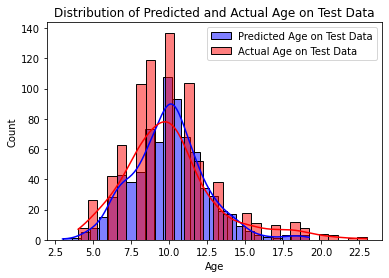

In [40]:
fig, ax = plt.subplots()

sns.histplot(prediction3, kde=True, color='b', label="Predicted Age on Test Data", ax=ax)

sns.histplot(Y_test, kde=True, color='r', label="Actual Age on Test Data", ax=ax)

plt.title('Distribution of Predicted and Actual Age on Test Data')
plt.legend()
plt.show()

### Summary statistics of Original test set

In [41]:
Y_test.describe()

count    778.000000
mean      10.044987
std        3.133541
min        4.000000
25%        8.000000
50%       10.000000
75%       11.000000
max       23.000000
Name: Age, dtype: float64

### Summary statistics of predicted set

In [42]:
pd.Series(prediction3).describe()

count    778.000000
mean       9.981524
std        2.409150
min        2.972366
25%        8.507471
50%        9.985794
75%       11.325668
max       19.195807
dtype: float64

### Let's see the features importance

<AxesSubplot:title={'center':'Feature Importance (cover)'}, xlabel='F score', ylabel='Features'>

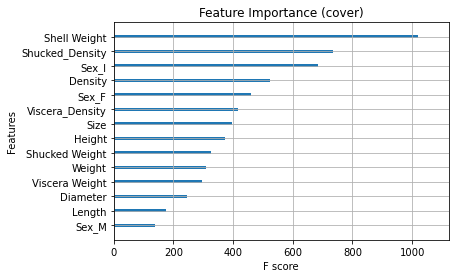

In [45]:
XGB.plot_importance(best_model3, importance_type='cover', show_values=False, title='Feature Importance (cover)')

### Shell weight is the most important feature, let's see it's distribution eith target variable

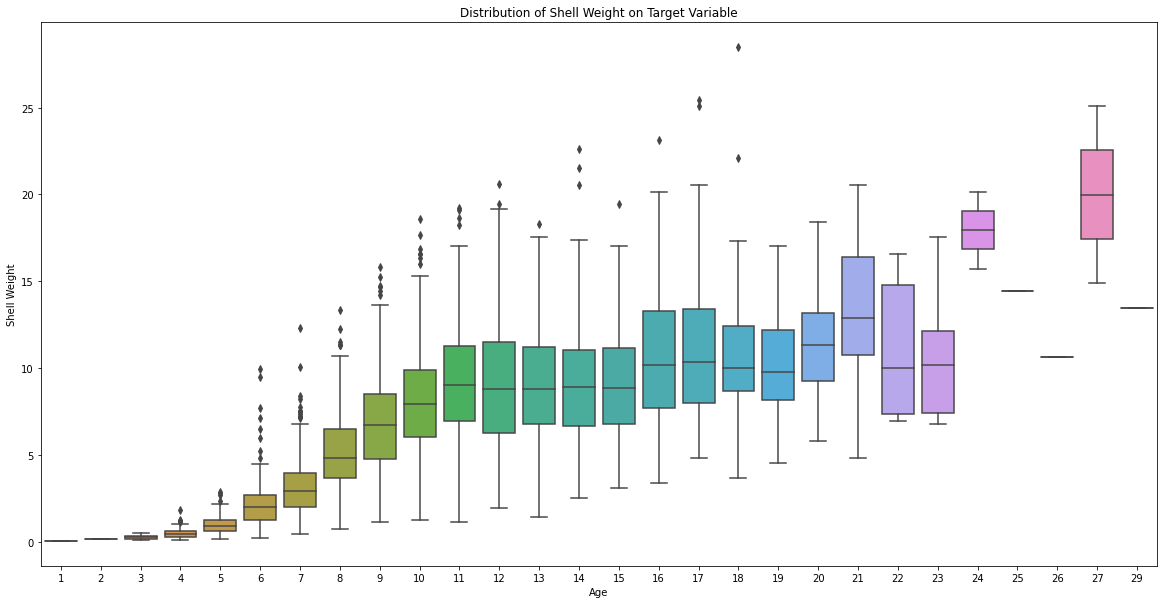

In [47]:
plt.figure(figsize=(20, 10))


sns.boxplot(x=df['Age'], y=df['Shell Weight'])
plt.xlabel('Age')
plt.ylabel('Shell Weight')
plt.title('Distribution of Shell Weight on Target Variable')
plt.show()

### SHell weight increases till the age of 11

### Now, here comes the inferential part, what can be done with age of crabs?, If we see in case of crabs fisherman

## How can I maximize profit for every fishing trip?

### By knowing the age of crabs, we can identify the size and maturity of the crabs, allowing us to selectively target the most valuable ones, younger crabs may be very small and need to be released, while older crabs may have higher market value. this knowledge helps optimize catch selection and maximize profitability.

## How can we ensure sustainable fishing practices in the same location?

### Understanding the age distribution of crabs can help to gain population's health and sustainability, by monitoring the age composition over time, we can identify if the fishing is sustainable or leading to overfishing, allowing size and age restrictions, as well as catch limits, allow them to reach maturity, will ensure a continuous population for future fishing.

## Can we predict future crab populations based on age data?

### By analyzing historical age data and monitoring trends, we can develop predictive models to estimate future crab populations, this information enables us to make informed decisions regarding fishing quotas, seasonal  restrictions, and long-term management strategies, ensuring the sustainability of the crab population and the feasibility of  fishing business.

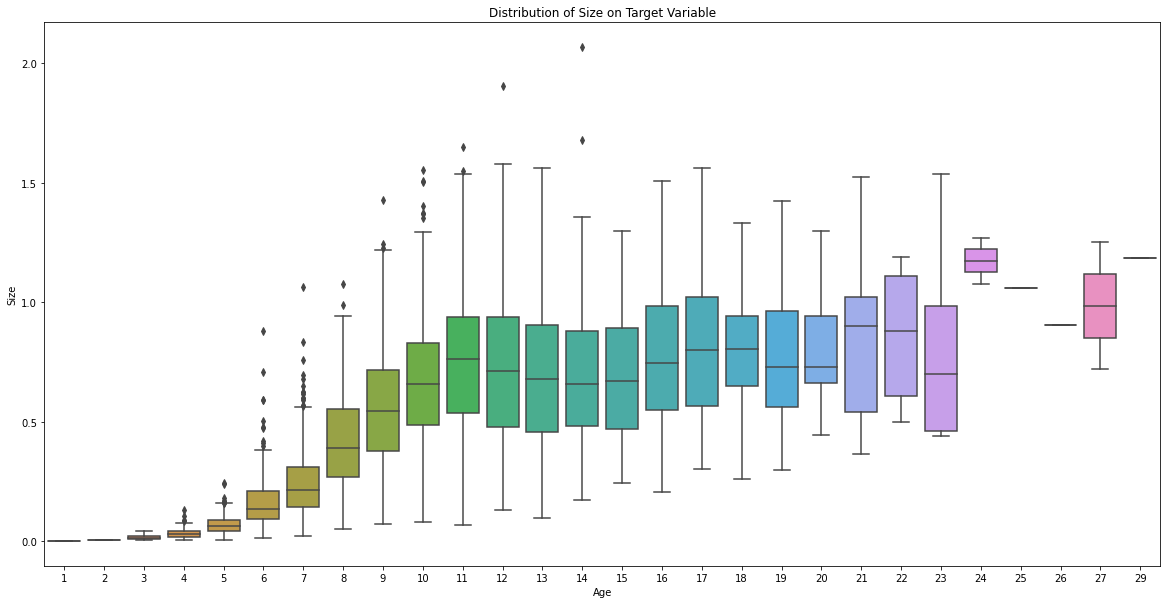

In [48]:
plt.figure(figsize=(20, 10))


sns.boxplot(x=df['Age'], y=df['Size'])
plt.xlabel('Age')
plt.ylabel('Size')
plt.title('Distribution of Size on Target Variable')
plt.show()

### Size increases till age 12, looks somewhat similar to shell weight